In [1]:
import pandas as pd
import seaborn as sns

# I. Data Set
### I will be using the given data set (credit_predict.csv) 

In [2]:
credit_predict_df = pd.read_csv('credit_predict.csv')

In [3]:
credit_predict_df.head()

,Income,Limit,Cards,Age,Education,Gender_Val,Rating_Label
0,14.891,3606,2,34,11,0,poor
1,106.025,6645,3,82,15,1,poor
2,104.593,7075,4,71,11,0,poor
3,148.924,9504,3,36,11,1,fair
4,55.882,4897,2,68,16,0,poor


# II. Premilinary Analysis (35pts)

In [4]:
rows, cols = credit_predict_df.shape

In [5]:
# How many independent variables are there?
print(f'There are {cols} columns in the data set. ')
print(f'There are {rows} rows in the data set')

There are 7 columns in the data set. 
There are 400 rows in the data set


In [6]:
print(f'Based on the professor and my own visualization, the dataset credit_predict has only 1 target dataset (dependent variable), which means there are {cols-1} independet variables')


Based on the professor and my own visualization, the dataset credit_predict has only 1 target dataset (dependent variable), which means there are 6 independet variables


In [7]:

credit_predict_features = credit_predict_df.drop('Rating_Label', axis=1)

In [8]:
credit_predict_target = pd.DataFrame(credit_predict_df['Rating_Label'])

In [9]:
credit_predict_features.head()

,Income,Limit,Cards,Age,Education,Gender_Val
0,14.891,3606,2,34,11,0
1,106.025,6645,3,82,15,1
2,104.593,7075,4,71,11,0
3,148.924,9504,3,36,11,1
4,55.882,4897,2,68,16,0


In [10]:
credit_predict_target.head()

,Rating_Label
0,poor
1,poor
2,poor
3,fair
4,poor


In [11]:
# Report basic descriptive statistics (min, max, mean) for each independent variable.
print("Max for each independent variable")
credit_predict_features.max()

Max for each independent variable


Income          186.634
Limit         13913.000
Cards             9.000
Age              98.000
Education        20.000
Gender_Val        1.000
dtype: float64

In [12]:
print("Min for each independent variable")
credit_predict_features.min()

Min for each independent variable


Income         10.354
Limit         855.000
Cards           1.000
Age            23.000
Education       5.000
Gender_Val      0.000
dtype: float64

In [13]:
print("Mean for each independent variable")
credit_predict_features.mean()

Mean for each independent variable


Income          45.218885
Limit         4735.600000
Cards            2.957500
Age             55.667500
Education       13.450000
Gender_Val       0.517500
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B78EA92948>,
      dtype=object)

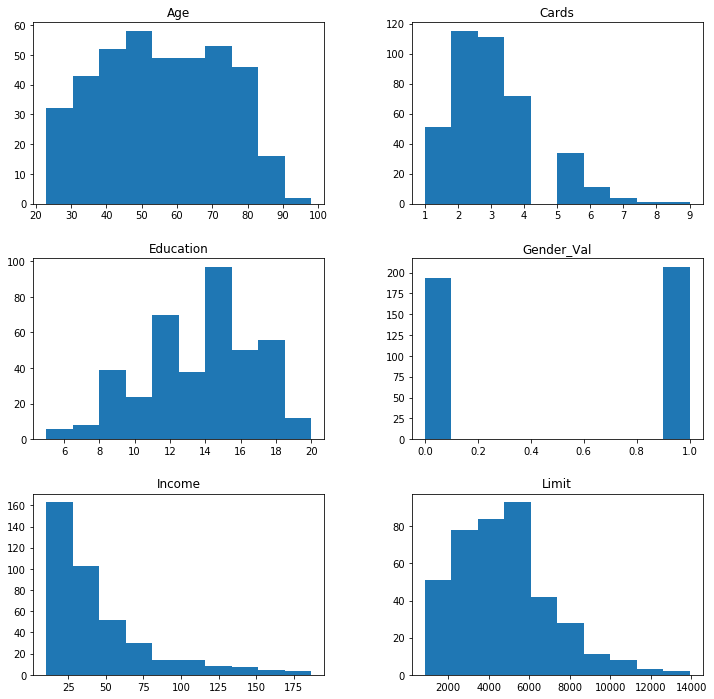

In [14]:
# graph each independent variable!
# Determine if each independent variable is multi-modal or not and report.
credit_predict_features.hist(figsize=(12,12), grid=False)

In [47]:
#This calculates the mode of each independent variable

modee = credit_predict_features.mode()
for label in credit_predict_features.columns:
    modee[label].fillna(0, inplace=True)


In [48]:
modee

,Income,Limit,Cards,Age,Education,Gender_Val
0,23.793,855,2.0,44.0,16.0,1.0
1,0.000,2120,0.0,66.0,0.0,0.0
2,0.000,2525,0.0,0.0,0.0,0.0
3,0.000,2860,0.0,0.0,0.0,0.0
4,0.000,3388,0.0,0.0,0.0,0.0
5,0.000,3461,0.0,0.0,0.0,0.0
6,0.000,3907,0.0,0.0,0.0,0.0
7,0.000,4391,0.0,0.0,0.0,0.0
8,0.000,5140,0.0,0.0,0.0,0.0
9,0.000,5673,0.0,0.0,0.0,0.0


- From what I see, the independent variable Income does not seem to be a multimodal distribution. It looks more like a unimodal. 

- the independent variable Limit seems to be multimodal. 

- Cards is unimodal. 

- Age is not multimodal. I believe Age is bimodal.

- Education is unimodal.

- Limit unimodal

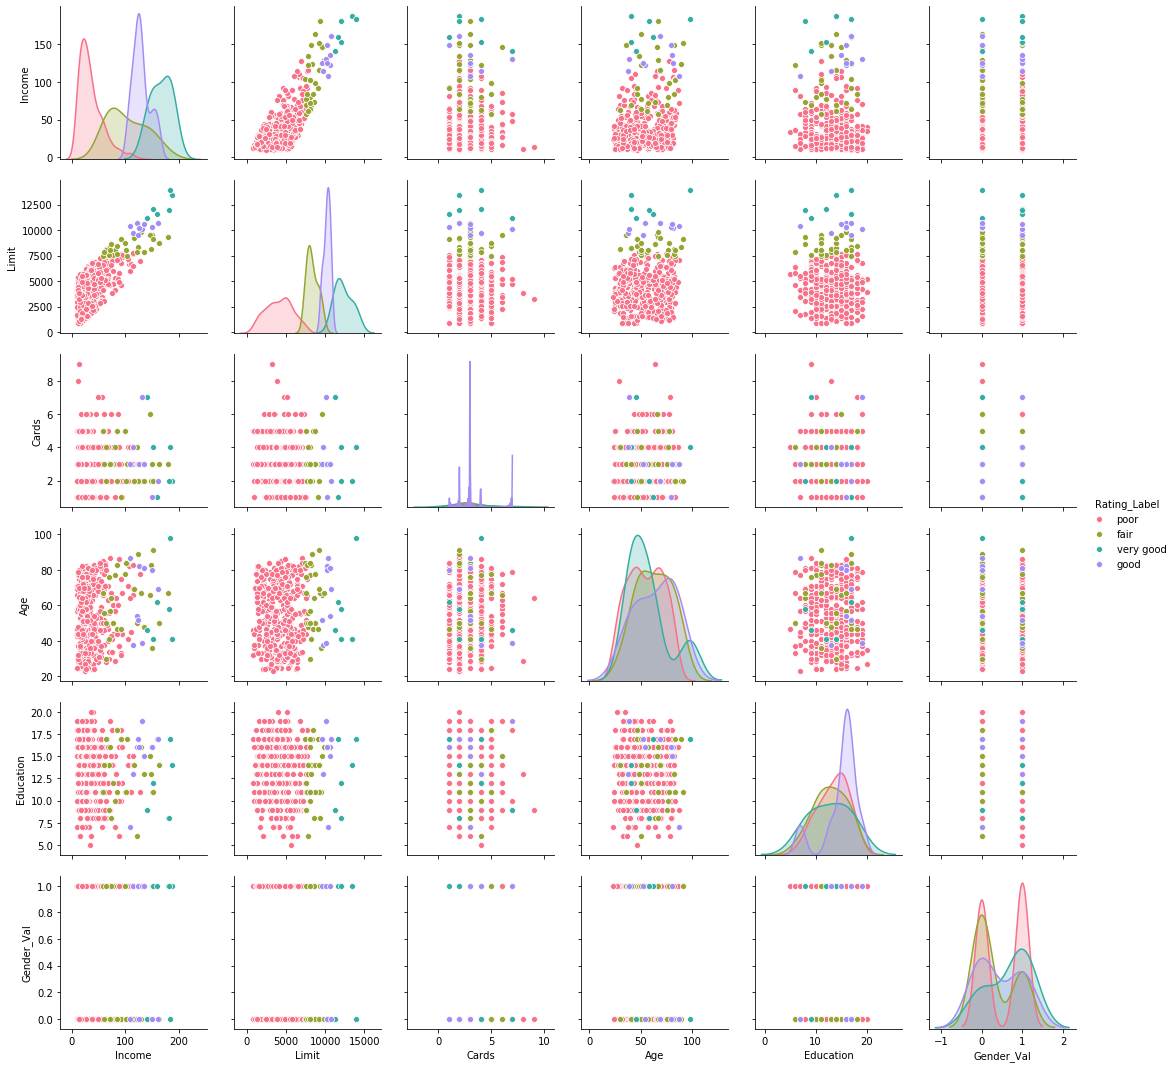

In [15]:
# Use scatter plots to determine if there are interesting relationships between variables 
# or if observations in the data set form clusters.

sns.pairplot(credit_predict_df, hue="Rating_Label", palette="husl")


There seems to be a strong relationship between some of the variables. For instance, the variable Limit and Income have a relationship because it is modetely strong, positive, and linear. While Education and Gender_Val do not have a strong relationship or might not have a relationship at all. 

From my observation, this data set forms clusters because sometimes the data points in a scatter plot form distinct groups. These groups are what's called clusters, and as you can see above we have different variables forming their own groups. For example, take a look at the scatter plot of Income and Limit and notice how the label poor from the dependent variable forms their own group, and same as fair, very good and good. It is easier to notice the label poor because there's more of it.

In [16]:
# Determine how many labels there are in the dependent variable.
labels = []
for row in range(len(credit_predict_target)):
     if credit_predict_target['Rating_Label'][row] not in labels:
         labels.append(credit_predict_target['Rating_Label'][row])
total_labels = len(labels)

In [17]:
print(f'There are {total_labels} labels in the dependent variable "Rating_Label"')

There are 4 labels in the dependent variable "Rating_Label"


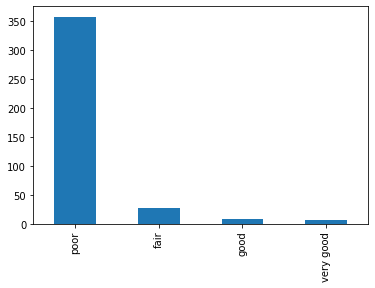

In [18]:
# Is this a balanced classification problem? If yes, why? If no, why not?
credit_predict_target.loc[:,'Rating_Label'].value_counts().plot.bar()

This is not a balanced classification problem because as you can see, the label "poor" has about 350 while "fair", "good" and "very good" do not even reach 50.

# III. Model building (35pts)

In [19]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from treeviz import tree_print

In [20]:
# get data
df = pd.read_csv('credit_predict.csv')
X  = df.drop(['Rating_Label'],axis=1)
y = df['Rating_Label']

In [21]:
# setting up grid search
model = model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }

In [22]:
grid = GridSearchCV(model, param_grid, cv=5)

In [23]:
# performing grid search 
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
        

In [49]:
# print out best parameters
print(f'Best hyper-parameters: {grid.best_params_}')

Best hyper-parameters: {'criterion': 'entropy', 'max_depth': 3}


In [25]:
# print out the best model tree
print("Best tree:")
tree_print(grid.best_estimator_,X)

Best tree:
if Limit =< 7409.0: 
  |then poor
  |else if Limit =< 9550.0: 
  |  |then if Limit =< 7789.0: 
  |  |  |then poor
  |  |  |else fair
  |  |else if Limit =< 10974.0: 
  |  |  |then good
  |  |  |else very good
<------->
Tree Depth:  3


Based on my tree model, I do not see any surprises. The depth of my tree is small and it makes it hard to check other labels but from what I can see, everything looks well. The tree is also intuitive, and did not reveal anything that was unusual. I would interpret this tree with respect to the givend dataset as very accurate. Based on the tree, all the predictions on the rating_label are very accurate. Finally, yes the tree model can be related back to graphs and scatter plots. I personally tested it with the graphs and scatter plots from above.


The best hyperparameters is entropy at a maxdepth of 3. There is almost no surprises, it is a bit surprising that the tree is only dependent on one independent variable being Limit. The tree depending on Limit for the result seems reasonably to me when you go back to look at the scatter plots for limit comparing the other variables there are clusters for poor on all of the lower end of the plot, and all the other label comes after which makes sense.

# IV. Model Evaluation (30pts) 

In [51]:
# compute the accuracy       
predict_y = grid.best_estimator_.predict(X)
acc = accuracy_score(y, predict_y)

In [52]:
# print accuracy          
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.985


In [53]:
from sklearn.model_selection import train_test_split
from confint import classification_confint

In [54]:
# Compute the 95% classification confidence interval for this model.

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=2)

In [55]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [56]:
# fit the model on the training set of data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [57]:
# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
acc = accuracy_score(y_test, y_test_model)
observations = X_test.shape[0]
lb,up = classification_confint(acc, observations)
print("classification confidence interval for this model: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,up))

classification confidence interval for this model: 0.97 (0.94,1.00)


In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
labels = ['poor','fair','good','very good']
cm = confusion_matrix(y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Confusion Matrix:
           poor  fair  good  very good
poor        358     0     0          0
fair          5    21     1          0
good          0     0     9          0
very good     0     0     0          6


According to this confusion matrix, there are very little errors in the model. There were three times the model predicted poor when it was actually fair, and it predicted once that it was good when it was actually fair. But, for the most part, the model is accurate.